In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm
import sys
sys.path.append("../")
import constants
import environment


import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
import evaluate_models as ev


In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**3

In [3]:
env = gym.make('SQLstruct-v1')
folder = ""
retest = False

In [6]:
ppo_models = []
import glob
for i in range(n_simulations):
    print(i)
    for file in glob.glob(folder + "ignore_ppo_"+ str(i) +"_simulb64*.zip"):
        print(file[:-4], end = ":")
        model = PPO.load(file[:-4])
        ppo_models.append(model)
        print(model)

0
ignore_ppo_0_simulb64_20210615105645615748:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B7FECD850>
1
ignore_ppo_1_simulb64_20210615112104435426:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B7FFE0910>
2
ignore_ppo_2_simulb64_20210615114500981881:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B7FFE0DC0>
3
ignore_ppo_3_simulb64_20210615120923062860:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B7FFE0FD0>
4
ignore_ppo_4_simulb64_20210615123332822156:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B7FF2FC10>
5
ignore_ppo_5_simulb64_20210615125732147145:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B01050970>
6
ignore_ppo_6_simulb64_20210615132218883348:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B01050F70>
7
ignore_ppo_7_simulb64_20210615134616892697:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B7FF63AF0>
8
ignore_ppo_8_simulb64_20210615141047169225:<stable_baselines3.ppo.ppo.PPO object at 0x0000019B7FF639A0>
9
ignore_ppo_9_simulb64_20210615143509517574:<

In [7]:
if(retest):
    rewards = []
    num_steps = []
    successes = []
    for i in tqdm(range(n_simulations)):
        out_rewards, out_num_steps, out_successes, out_successes2 = ev.test_episodes(ppo_models[i], env, num_episodes=1000)
        
        rewards.append(out_rewards)
        num_steps.append(out_num_steps)
        successes.append(np.mean(out_successes))
    
    rewards = np.array(rewards)
    num_steps = np.array(num_steps)
    successes = np.array(successes)

In [8]:
if(retest):
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
    np.savetxt("ignore_struct_b64_num_steps"+timestamp+".csv", num_steps)
    np.savetxt("ignore_struct_b64_num_steps.csv", num_steps)
    np.savetxt("ignore_struct_b64_rewards"+timestamp+".csv", rewards)
    np.savetxt("ignore_struct_b64_rewards.csv", rewards)
    np.savetxt("ignore_struct_b64_successes.csv", successes2)
    retest = False
else:
    num_steps = np.loadtxt("ignore_struct_b64_num_steps.csv")
    rewards = np.loadtxt("ignore_struct_b64_rewards.csv")
    successes = np.loadtxt("ignore_struct_b64_successes.csv")
    
    

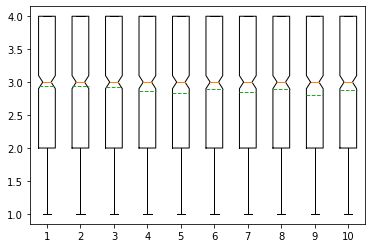

In [15]:
plt.boxplot(num_steps.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/number_of_queries_per_episode_of_the_10_different_ppo_agents.png")

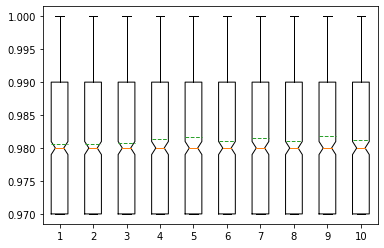

In [16]:
plt.boxplot(rewards.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/rewards_for_the_10_different_ppo_agents.png")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


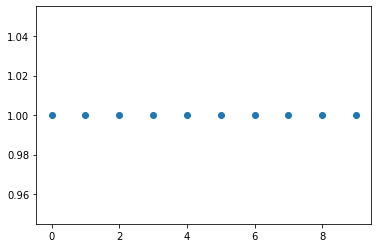

In [12]:
plt.plot(successes, "o")
print(successes)

In [16]:
#Lets look at some of the simulations:
ev.look_at_an_episode(ppo_models[0], env)

16 1" union select account, NULL, NULL from private --:1 3
steps 1 reward 1


In [17]:
ev.look_at_an_episode(ppo_models[0], env)

16 1" union select account, NULL, NULL from private --:-0.01 2
6 1' union select account from private --:-0.01 0
7 1' union select account, NULL from private --:1 3
steps 3 reward 0.98


In [19]:
ev.look_at_an_episode(ppo_models[0], env)

16 1" union select account, NULL, NULL from private --:-0.01 0
22 1 union select account from private --:-0.01 0
23 1 union select account, NULL from private --:-0.01 0
24 1 union select account, NULL, NULL from private --:1 3
steps 4 reward 0.97


In [20]:
ev.look_at_an_episode(ppo_models[1], env)

15 1" union select account, NULL from private --:1 3
steps 1 reward 1


In [21]:
ev.look_at_an_episode(ppo_models[2], env)

14 1" union select account from private --:-0.01 2
6 1' union select account from private --:-0.01 0
8 1' union select account, NULL, NULL from private --:-0.01 0
7 1' union select account, NULL from private --:1 3
steps 4 reward 0.97
